In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\AQUIB MANSURI\Downloads\placement.csv")

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.shape

(100, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [53]:
df = df.iloc[:,1:4]

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [16]:
import matplotlib.pyplot as plt

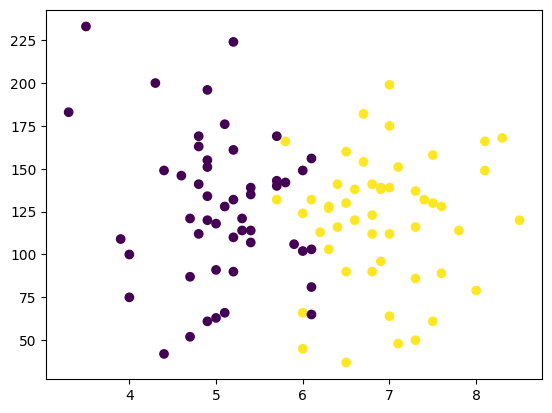

In [20]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [21]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [26]:
X_train

,cgpa,iq
45,6.0,66.0
27,6.0,124.0
8,6.1,156.0
55,7.8,114.0
61,7.3,137.0
...,...,...
23,4.7,87.0
50,3.5,233.0
16,5.2,224.0
26,7.0,199.0


In [27]:
y_train

45    1
27    1
8     0
55    1
61    1
     ..
23    0
50    0
16    0
26    1
0     1
Name: placement, Length: 90, dtype: int64

In [29]:
X_test

,cgpa,iq
3,7.4,132.0
83,7.5,130.0
87,5.7,132.0
6,5.7,143.0
64,7.0,64.0
66,6.9,96.0
86,5.1,128.0
38,6.5,160.0
11,6.9,138.0
72,7.3,116.0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_train

array([[ 0.06661743, -1.40265957],
       [ 0.06661743,  0.01110428],
       [ 0.15350973,  0.79111192],
       [ 1.63067888, -0.23264811],
       [ 1.19621736,  0.32798238],
       [-0.45473638,  0.2792319 ],
       [-0.8891979 , -0.08639668],
       [ 0.67486355,  0.74236144],
       [ 0.76175585, -0.28139859],
       [-0.10716717,  0.44985857],
       [ 1.89135578,  1.0348643 ],
       [ 0.76175585, -0.81765384],
       [-0.62852099, -0.81765384],
       [-0.19405948,  1.10799002],
       [ 0.93554046,  0.37673286],
       [ 0.93554046, -0.28139859],
       [-1.75812092, -0.35452431],
       [-0.8891979 ,  0.66923572],
       [ 1.89135578,  0.62048524],
       [-1.67122862, -1.18328242],
       [ 1.37000197, -1.52453577],
       [-0.9760902 ,  0.96173859],
       [ 1.19621736, -0.9151548 ],
       [-0.10716717,  1.0348643 ],
       [ 0.58797125,  0.35235762],
       [-0.8891979 , -1.52453577],
       [ 2.06514039,  1.08361478],
       [ 0.06661743,  0.62048524],
       [ 1.37000197,

In [34]:
X_test =  scaler.transform(X_test)

In [35]:
X_test

array([[ 1.28310967,  0.20610619],
       [ 1.37000197,  0.15735571],
       [-0.19405948,  0.20610619],
       [-0.19405948,  0.47423381],
       [ 0.93554046, -1.45141005],
       [ 0.84864815, -0.67140241],
       [-0.71541329,  0.10860523],
       [ 0.50107894,  0.88861287],
       [ 0.84864815,  0.35235762],
       [ 1.19621736, -0.18389763]])

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()

In [39]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
y_pred = clf.predict(X_test)

In [43]:
y_test

3     1
83    1
87    1
6     0
64    1
66    1
86    0
38    1
11    1
72    1
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.9

In [51]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

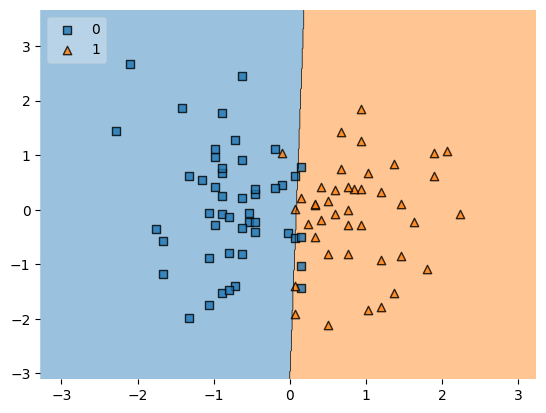

In [52]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))